In [1]:
import pandas as pd
import numpy as np

sizes = [1000, 10000, 100000, 1000000]

data = []
for size in sizes:
    with open(f"./adult_{size}_time_exclude_insert_db.log") as f:
        lines = f.readlines()
        for line in lines:
            times = [size]
            times += [float(x) for x in line.split(", ")]
            data.append(times)

df = pd.DataFrame(data=data, columns=["size", "Q1", "Q2", "Q3", "Q4", "Q5"])
df

,size,Q1,Q2,Q3,Q4,Q5
0,1000,0.856556,1.156328,0.882328,1.221451,1.124200
1,1000,0.932496,1.151873,0.750128,1.031837,0.793211
2,1000,0.663307,0.751463,0.665456,1.273959,0.793282
3,1000,0.895677,1.208345,0.542248,0.845293,0.640729
4,1000,0.758434,0.987249,0.697350,1.125168,1.039892
5,1000,0.798404,0.963740,0.754099,0.924093,0.953472
6,1000,0.710331,1.108063,0.630146,0.860547,1.009327
7,1000,0.767697,0.946795,0.662749,0.853887,1.204877
8,1000,0.775393,0.871579,0.642834,0.711870,1.091287
9,1000,0.783106,0.989452,0.858290,0.802941,0.796287


In [2]:
df = df.melt(id_vars="size", var_name="query", value_name="time")
df

,size,query,time
0,1000,Q1,0.856556
1,1000,Q1,0.932496
2,1000,Q1,0.663307
3,1000,Q1,0.895677
4,1000,Q1,0.758434
...,...,...,...
195,1000000,Q5,5965.657056
196,1000000,Q5,5949.580011
197,1000000,Q5,5972.600711
198,1000000,Q5,5922.970876


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.rcParams['figure.dpi'] = 300
sns.set_theme(style="ticks", font="Times New Roman", font_scale=1.6)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

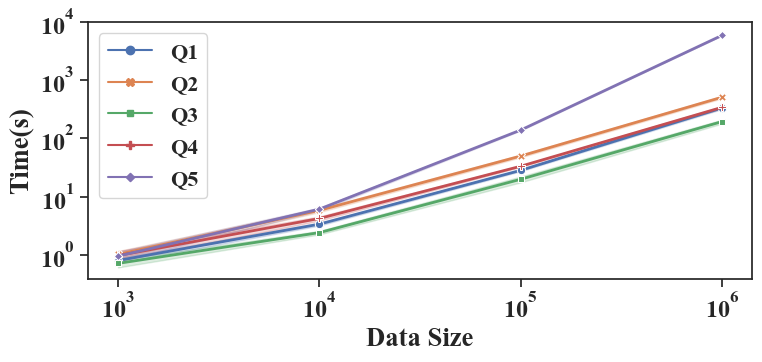

In [6]:
plt.rcParams["figure.figsize"] = [8, 4]

g = sns.lineplot(
    data=df, x="size", y="time", hue="query", err_style="band", errorbar="sd", style="query", markers=True, dashes=False, linewidth=2)
g.set_yscale("log")
g.set_xscale("log")
_ = g.set_yticks([1, 10, 100, 1000, 10000])
_ = g.set(xlabel="Data Size", ylabel="Time(s)")
plt.legend(fontsize='small', title_fontsize='small')
plt.minorticks_off()
g.legend_.set_title(None)
plt.tight_layout()
plt.savefig("figures/scalability_new.pdf", bbox_inches = 'tight', pad_inches = 0.05)
plt.show()
plt.close()

In [38]:
data = []
for size in sizes:
    with open(f"scalability_num_runs_1/adult_{size}_eps.log") as f:
        lines = f.readlines()
        for line in lines:
            eps_res = [size]
            split = line.split(", ")
            for eps in split:
                if eps == "None":
                    eps_res.append(np.nan)
                else:
                    eps_res.append(float(eps))
            data.append(eps_res)

df = pd.DataFrame(data=data, columns=["size", "Q1", "Q2", "Q3", "Q4", "Q5"])
df

,size,Q1,Q2,Q3,Q4,Q5
0,1000,10.0,7.0,0.7,9.0,10.0
1,1000,10.0,7.0,0.9,10.0,10.0
2,1000,10.0,3.0,5.0,10.0,10.0
3,1000,10.0,3.0,NaN,9.0,10.0
4,1000,10.0,4.0,1.0,10.0,10.0
5,1000,10.0,3.0,2.0,10.0,10.0
6,1000,10.0,4.0,0.8,10.0,10.0
7,1000,10.0,5.0,3.0,10.0,10.0
8,1000,10.0,4.0,NaN,9.0,10.0
9,1000,10.0,2.0,0.7,9.0,10.0


In [39]:
df = df.melt(id_vars="size", var_name="query", value_name="epsilon")
df

,size,query,epsilon
0,1000,Q1,10.0
1,1000,Q1,10.0
2,1000,Q1,10.0
3,1000,Q1,10.0
4,1000,Q1,10.0
...,...,...,...
195,1000000,Q5,10.0
196,1000000,Q5,10.0
197,1000000,Q5,5.0
198,1000000,Q5,10.0


In [1]:
import pandas as pd
df6 = pd.read_csv("../adult.csv")
pd.get_dummies(df6).size

3581710

In [2]:
df6.size

488415

In [3]:
df6["fnlwgt"].max()

1484705

In [4]:
df6["fnlwgt"].min()

12285

In [5]:
df6["fnlwgt"].max() - df6["fnlwgt"].min()

1472420

In [10]:
df = pd.read_csv("../scalability/adult_1000000.csv")
df["fnlwgt"].nunique()

60966